<a href="https://colab.research.google.com/github/OdysseusPolymetis/enssib_class/blob/main/2_simple_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NLP : tokenizing, lemmatizing, postagging**

---



## What's NLP and why do we need it ?
Generally speaking, loads of people use NLP as a preprocessing phase, for further textual treatment. And it is absolutely necessary if you want to avoid noise in statistical analysis and machine learning uses. Basically, preprocessing is **tokenizing**, **lemmatizing** and **postagging**.

## How do you do that without programming ?
I'll show you some basic tools you can easily use without knowing programming in python.

##**Some useful online tools**

###**UDPipe**
You'll find it [here](https://lindat.mff.cuni.cz/services/udpipe/).
<br>You can use that for short texts.
<br>One of its peculiarities is SVG dependency tree building.

###**Deucalion**
You'll find it [here](https://dh.chartes.psl.eu/deucalion/).
<br>Much more accurate for longer texts, not an easy output (although ready-to-use format). It's really good on Ancient French and Latin.

###**VoyantTools**
You'll find it [here](https://voyant-tools.org/).
<br>It's a visualization, directly online, but for more modules you can build it locally and it's really powerful and neat.

#**LE TAL : TOKENISATION, LEMMATISATION, POSTAGGING**

We're going to test **`stanza`**. There are loads of other modules on the matter (like`spacy` and `pie-extended`), but `stanza` generally outperforms them for accuracy and efficiency.

In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
catilinaires="Quousque tandem abutere, Catilina, patientia nostra ? Quamdiu etiam furor iste tuus nos eludet ? Quem ad finem sese effrenata jactabit audacia ? Nihilne te nocturnum praesidium Palatii, nihil urbis vigiliae, nihil timor populi, nihil concursus bonorum omnium, nihil hic munitissimus habendi senatus locus, nihil horum ora vultusque moverunt ? Patere tua consilia non sentis ? Constrictam jam horum omnium scientia teneri conjurationem tuam non vides ? Quid proxima, quid superiore nocte egeris, ubi fueris, quos convocaveris, quid consilii ceperis, quem nostrum ignorare arbitraris ? O tempora ! O mores ! Senatus haec intellegit, consul videt. Hic tamen vivit."

##**stanza (précédemment Stanford CoreNLP)**

`stanza` has several language models at your disposal (here's a [list](https://stanfordnlp.github.io/stanza/performance.html)), which you can get using the basic language code, like `grc` for Ancient Greek or `la` for Latin. But you can also specify which model you want like below.

In [ ]:
import stanza
stanza.download('la', package="perseus")

We begin with building a Pipeline, to indicate which processors we want to use (no need to add `ner` if you don't need named entity recognition).

In [ ]:
nlp_stanza = stanza.Pipeline(lang='la', package="perseus", processors='tokenize,pos,lemma, depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: la (Latin):
| Processor | Package          |
--------------------------------
| tokenize  | perseus          |
| mwt       | perseus          |
| pos       | perseus_nocharlm |
| lemma     | perseus_nocharlm |
| depparse  | perseus_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Now you can launch the nlp process.

In [ ]:
catilinaires_analyzed=nlp_stanza(catilinaires)

Here are some results, first for sentence division, and then for lemmatizing and postagging.

In [ ]:
for sent in catilinaires_analyzed.sentences:
  print("XXXXX "+sent.text+" XXXXX")

In [ ]:
for sent in catilinaires_analyzed.sentences:
  for token in sent.words:
    print(token.text + ' - ' + token.lemma + ' - ' + token.pos)

Quousque - quousque - ADV
tandem - tandem - ADV
abutere - abutor - VERB
, - , - PUNCT
Catilina - Catilina - PROPN
, - , - PUNCT
patientia - patientia - NOUN
nostra - noster - DET
? - ? - PUNCT
Quamdiu - quamdiu - ADV
etiam - etiam - ADV
furor - furor - NOUN
iste - iste - DET
tuus - tuus - DET
nos - nos - PRON
eludet - eludo - VERB
? - ? - PUNCT
Quem - qui - PRON
ad - ad - ADP
finem - finis - NOUN
sese - sui - PRON
effrenata - effreno - VERB
jactabit - cacto - VERB
audacia - audacia - NOUN
? - ? - PUNCT
Nihilne - nihilne - SCONJ
te - tu - PRON
nocturnum - nocturnus - ADJ
praesidium - praesidium - NOUN
Palatii - palatium - NOUN
, - , - PUNCT
nihil - nihil - PRON
urbis - urbs - NOUN
vigiliae - vigilia - NOUN
, - , - PUNCT
nihil - nihil - PRON
timor - timor - NOUN
populi - populus - NOUN
, - , - PUNCT
nihil - nihil - PRON
concursus - concursus - NOUN
bonorum - bonus - ADJ
omnium - omnis - DET
, - , - PUNCT
nihil - nihil - PRON
hic - hic - DET
munitissimus - munitis - ADJ
habendi - habeo - 

# Let's try with a (much bigger) text.

As the text we're going to use is very long, we will use batch processing, that is, launching several processes at once for GPU management.

In [ ]:
def batch_process(text, nlp, batch_size=50):
    paragraphs = text.split('\n')
    batches = [paragraphs[i:i + batch_size] for i in range(0, len(paragraphs), batch_size)]

    words = []

    for batch in batches:
        batch_text = '\n'.join(batch)
        doc = nlp(batch_text)
        for sentence in doc.sentences:
            for word in sentence.words:
                token={}
                if word.lemma is not None:
                    token["word"]=word.text
                    token["lemma"]=word.lemma
                    token["pos"]=word.pos
                    words.append(token)

    return words

In [ ]:
import stanza
stanza.download('fr')
import string

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: fr (French) ...
INFO:stanza:File exists: /root/stanza_resources/fr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


Let's get the _Misérables_.

In [ ]:
!wget https://raw.githubusercontent.com/ABC-DH/EnExDi2024/main/materials/3_NLP/miserables.txt

--2024-04-14 11:52:55--  https://raw.githubusercontent.com/ABC-DH/EnExDi2024/main/materials/3_NLP/miserables.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3173790 (3.0M) [text/plain]
Saving to: ‘miserables.txt.1’

miserables.txt.1    100%[===================>]   3.03M  --.-KB/s    in 0.05s   

2024-04-14 11:52:55 (61.1 MB/s) - ‘miserables.txt.1’ saved [3173790/3173790]



In [ ]:
filepath_of_text = "/content/miserables.txt"

In [ ]:
full_text = open(filepath_of_text, encoding="utf-8").read()

In [ ]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


This part may take some time (for me it took something like 4 minutes).

In [ ]:
miserables_analyzed = batch_process(full_text, nlp_stanza)

In [ ]:
print(miserables_analyzed[5:15])

[{'word': '1815', 'lemma': '1815', 'pos': 'NUM'}, {'word': ',', 'lemma': ',', 'pos': 'PUNCT'}, {'word': 'M.', 'lemma': 'monsieur', 'pos': 'NOUN'}, {'word': 'Charles-François-Bienvenu', 'lemma': 'Charles-François-Bienvenu', 'pos': 'PROPN'}, {'word': 'Myriel', 'lemma': 'Myriel', 'pos': 'PROPN'}, {'word': 'était', 'lemma': 'être', 'pos': 'AUX'}, {'word': 'évêque', 'lemma': 'évêque', 'pos': 'NOUN'}, {'word': 'de', 'lemma': 'de', 'pos': 'ADP'}, {'word': 'Digne', 'lemma': 'Digne', 'pos': 'PROPN'}, {'word': '.', 'lemma': '.', 'pos': 'PUNCT'}]


For your own projects, you can get loads of stopword lists [here](https://github.com/stopwords-iso).


In [ ]:
!wget https://raw.githubusercontent.com/ABC-DH/EnExDi2024/main/materials/3_NLP/stopwords_fr.txt

--2024-04-14 11:57:16--  https://raw.githubusercontent.com/ABC-DH/EnExDi2024/main/materials/3_NLP/stopwords_fr.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5891 (5.8K) [text/plain]
Saving to: ‘stopwords_fr.txt’

stopwords_fr.txt    100%[===================>]   5.75K  --.-KB/s    in 0s      

2024-04-14 11:57:16 (37.6 MB/s) - ‘stopwords_fr.txt’ saved [5891/5891]



In [ ]:
stopwords = open("/content/stopwords_fr.txt",'r',encoding="utf8").read().split("\n")

In [ ]:
forms = []
lemmas = []
no_stop = []

for token in miserables_analyzed:
    form = token["word"]
    lemma = token["lemma"]

    if lemma not in string.punctuation:
        forms.append(form)
        lemmas.append(lemma)

    if lemma not in string.punctuation and lemma not in stopwords:
        no_stop.append(lemma)

In [ ]:
len(lemmas)

567261

In [ ]:
len(no_stop)

210637

And now we're going to build some basic representations of our text to see why preprocessing is important.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def create_word_cloud(words_list, title):
    text = ' '.join(words_list)

    radius = 495

    diameter = radius * 2
    center = radius
    x, y = np.ogrid[:diameter, :diameter]
    mask = (x - center) ** 2 + (y - center) ** 2 > radius ** 2
    mask = 255 * mask.astype(int)

    mask_rgba = np.dstack((mask, mask, mask, 255 - mask))

    wordcloud = WordCloud(repeat=False, width=diameter, height=diameter,
                          background_color=None, mode="RGBA", colormap='plasma',
                          mask=mask_rgba).generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

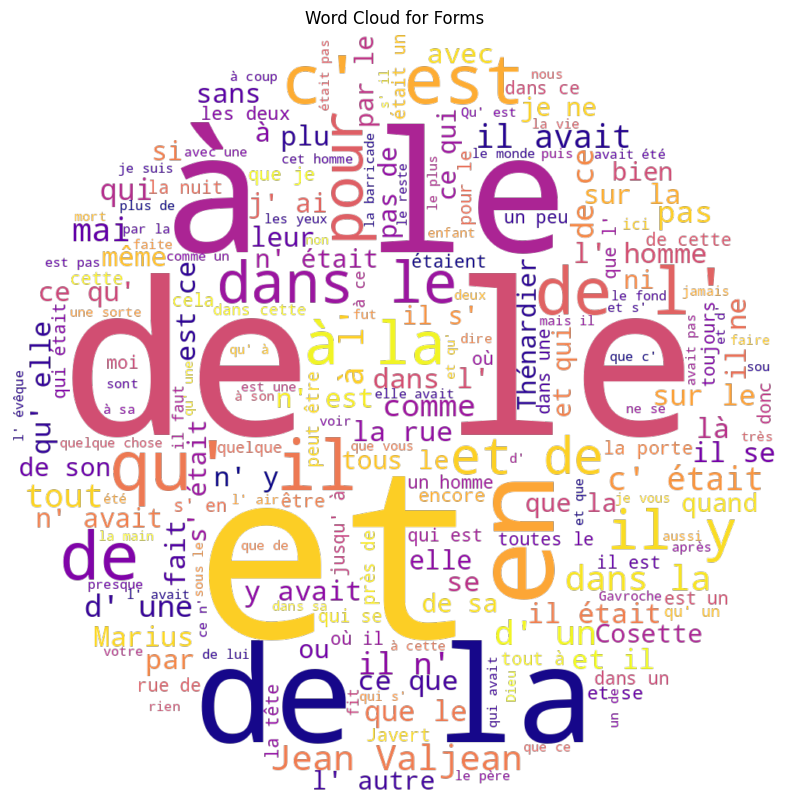

In [ ]:
create_word_cloud(forms, 'Word Cloud for Forms')

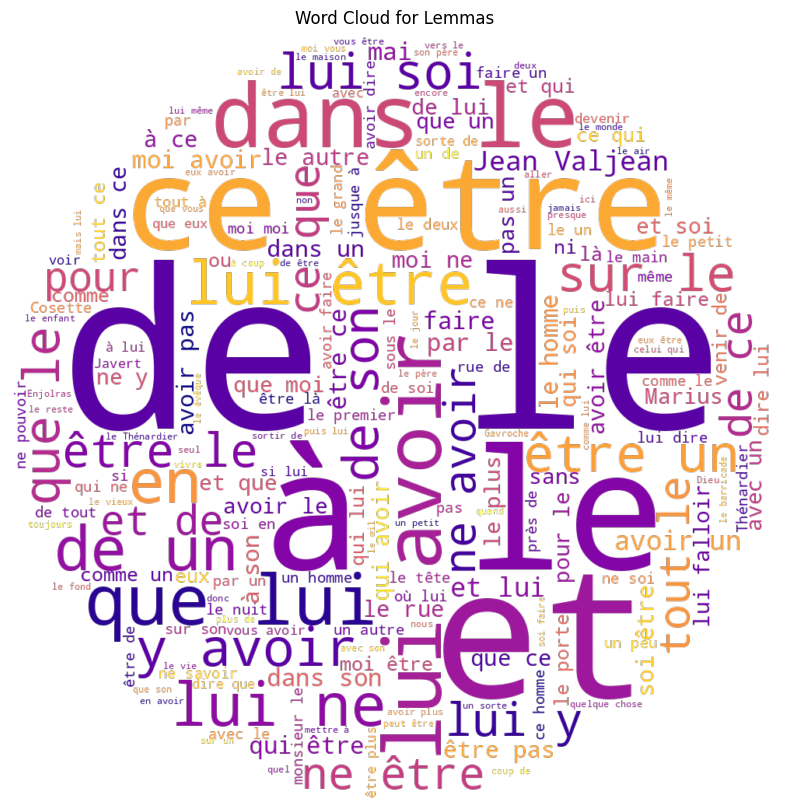

In [ ]:
create_word_cloud(lemmas, 'Word Cloud for Lemmas')

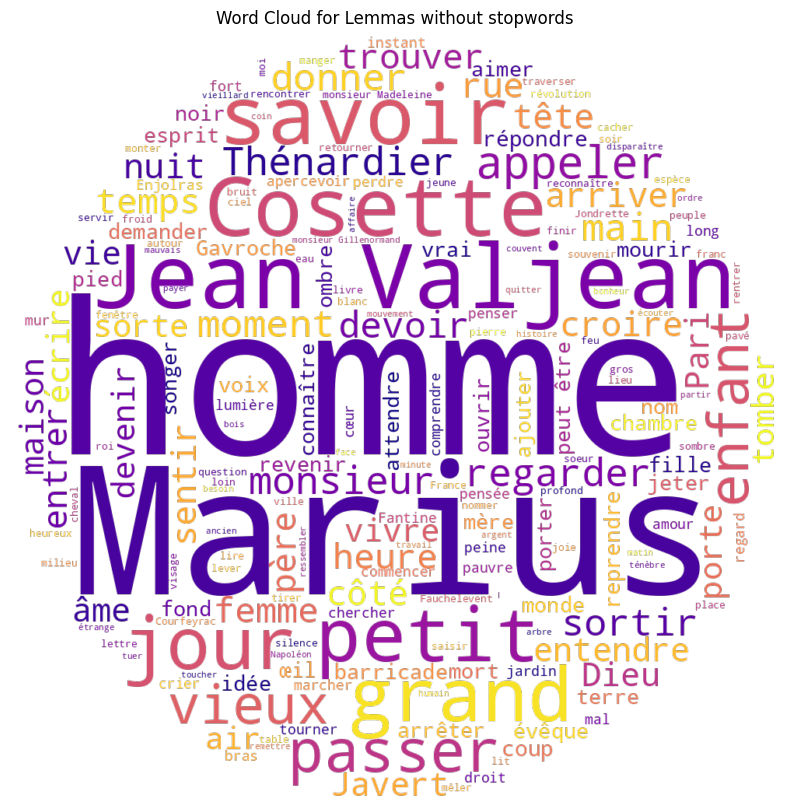

In [ ]:
create_word_cloud(no_stop, 'Word Cloud for Lemmas without stopwords')